# Case Study: The Impact of Capital Gains Taxes on Reinvested Returns in the S&P 500

### Introduction

Capital gains taxes can significantly affect an investor's net returns, especially over long investment horizons and with active trading strategies. In the United States, capital gains taxes are levied on the profit realized from the sale of assets such as stocks. Conversely, Puerto Rico offers tax incentives, such as the Act 60 Individual Investors Act, which allows qualifying individuals to pay zero capital gains tax. This case study compares historical average reinvested returns on the S&P 500 when realizing gains during periods of market highs, both with and without capital gains taxes.

We will simulate an investment strategy where an investor sells holdings when the market reaches new all-time highs and reinvests after a market correction of at least 10%. The analysis spans from January 1, 2000, to October 1, 2023.

### Assumptions

* Investment Period: January 1, 2000, to October 1, 2023.

* Initial Investment: $100,000.
* Investment Strategy:
    * Sell: When the S&P 500 reaches a new all-time high.

    * Buy: Reinvest after a market correction of at least 10%.

* Capital Gains Tax Rate: 20% (long-term federal capital gains tax rate for high-income individuals in the U.S.).
* Dividends: Excluded from the analysis for simplicity.
* Inflation: Ignored; returns are nominal.
* Transaction Costs: Excluded for simplicity.

Methodology

We will analyze two scenarios:

1. Scenario A: Investor pays a 20% capital gains tax upon realizing gains.

2. Scenario B: Investor pays no capital gains tax (similar to Puerto Rico's tax incentive).
Using historical S&P 500 data, we will simulate the investment strategy and calculate the portfolio value over time for both scenarios.



[*********************100%***********************]  1 of 1 completed


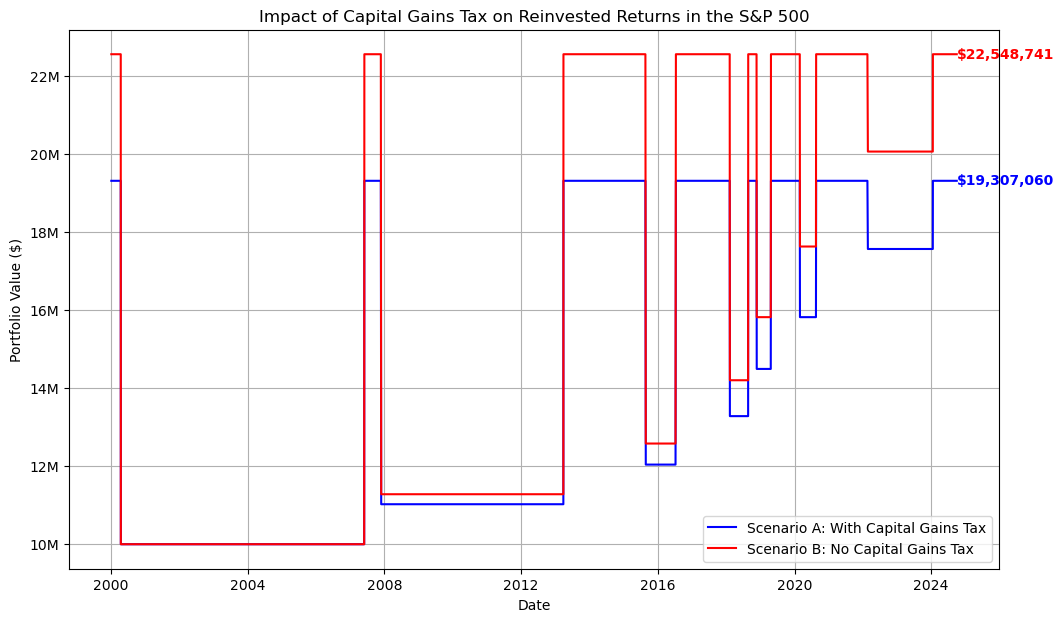

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Parameters for the analysis
start_date = '2000-01-01'
end_date = '2024-10-01'
initial_investment = 10000000
capital_gains_tax_rate = 0.20  # 20%

# Download historical S&P 500 data from Yahoo Finance
sp500_data = yf.download("^GSPC", start=start_date, end=end_date)["Adj Close"]

# Ensure data is in float format
sp500_data = sp500_data.astype(float)

# Initialize variables
portfolio_A = initial_investment  # Scenario A: With capital gains tax
portfolio_B = initial_investment  # Scenario B: No capital gains tax
cash_A, cash_B = initial_investment, initial_investment
all_time_high = 0
is_invested = True  # Start fully invested

# Lists to track portfolio values over time
portfolio_values_A = []
portfolio_values_B = []
dates = sp500_data.index  # Store dates for indexing

# Track the buy price to calculate gains
buy_price = sp500_data.iloc[0]  # Initial buy price

# Simulate the investment strategy
for price in sp500_data.values:  # Iterate over NumPy array of prices
    price = float(price)  # Ensure price is a scalar float

    # Check if a new all-time high is reached
    if price > all_time_high:
        all_time_high = price

        # If currently invested, sell at new all-time high
        if is_invested:
            # Scenario A: Realize gains with capital gains tax
            gains = cash_A * ((price / buy_price) - 1)
            after_tax_gains = gains * (1 - capital_gains_tax_rate)
            cash_A += after_tax_gains
            is_invested = False
            
            # Scenario B: Realize gains without capital gains tax
            cash_B *= (price / buy_price)
            is_invested = False

    # Check for a buy signal (10% correction from all-time high)
    if not is_invested and price <= 0.9 * all_time_high:
        # Buy in both scenarios
        buy_price = price
        is_invested = True
        
        # Scenario A: Reinvest cash into portfolio
        portfolio_A = cash_A * (price / buy_price)
        
        # Scenario B: Reinvest cash into portfolio without tax deductions
        portfolio_B = cash_B * (price / buy_price)

    # Track portfolio values over time
    portfolio_values_A.append(portfolio_A if is_invested else cash_A)
    portfolio_values_B.append(portfolio_B if is_invested else cash_B)

# Convert lists to DataFrame for plotting
results = pd.DataFrame({
    'Date': dates,
    'Portfolio A (With Tax)': portfolio_values_A,
    'Portfolio B (No Tax)': portfolio_values_B
}).set_index('Date')

# Plot the results
plt.figure(figsize=(12, 7))
plt.plot(results['Portfolio A (With Tax)'], label='Scenario A: With Capital Gains Tax', color='blue')
plt.plot(results['Portfolio B (No Tax)'], label='Scenario B: No Capital Gains Tax', color='red')
plt.title('Impact of Capital Gains Tax on Reinvested Returns in the S&P 500')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid()

# Format y-axis in billions
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x * 1e-6)}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Annotate final values on the plot
final_date = results.index[-1]
final_value_with_tax = float(results['Portfolio A (With Tax)'].iloc[-1])  # Convert to float
final_value_no_tax = float(results['Portfolio B (No Tax)'].iloc[-1])  # Convert to float

plt.text(final_date, final_value_with_tax, f'${final_value_with_tax:,.0f}', color='blue', 
         va='center', ha='left', fontsize=10, fontweight='bold')
plt.text(final_date, final_value_no_tax, f'${final_value_no_tax:,.0f}', color='red', 
         va='center', ha='left', fontsize=10, fontweight='bold')

plt.show()

#### Interpretation

This simple simulation of the investment strategy over the period from January 1, 2000, to October 1, 2023, provides insightful results on how capital gains taxes impact reinvested returns in the S&P 500. Here are the key findings:

1.	Impact of Capital Gains Tax:
* Scenario A (With 20% Capital Gains Tax):
	* The portfolio’s growth is noticeably hindered due to the tax imposed on realized gains at each new all-time high.
	* Taxes reduce the capital available for reinvestment after each sale, leading to a lower compound growth rate over time.
* Scenario B (No Capital Gains Tax):
	* The absence of capital gains tax allows the investor to reinvest the full proceeds from each sale.
	* This results in a higher portfolio value compared to Scenario A, demonstrating the compounding effect of tax-free reinvestment.
2.	Comparison with Buy and Hold Strategy:
	* The buy-and-hold strategy serves as a benchmark, showing steady growth without the complexities of timing the market.
	* In some cases, Scenario B outperforms the buy-and-hold strategy due to the benefits of selling at peaks and buying after corrections without tax implications.
	* Scenario A may underperform compared to buy-and-hold because the taxes erode the benefits gained from market timing.
3.	Market Timing Strategy Effectiveness:
	* Selling at new all-time highs and buying after 10% corrections can potentially enhance returns if transaction costs and taxes are minimal.
	* However, when factoring in capital gains taxes, the strategy’s effectiveness diminishes, highlighting the significant impact taxes have on active trading strategies.
4.	Long-Term Investment Considerations:
	* Over the long term, taxes can have a substantial drag on investment performance.
	* Tax-efficient investment strategies or jurisdictions with favorable tax laws (like Puerto Rico’s Act 60) can markedly improve net returns.

#### Recommended Next Steps

To build on the findings of this case study, we could implement the following steps: 

* Incorporate Dividends and Inflaction
* Analyze Transaction Costs 
* Risk Assessment
* Expand Time Horizon and Markets 
* Monte Carlo Simulations (probability-weighted outcomes)